**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [2]:
# ENTER YOUR CODE HERE
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [ ]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 84.3MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [ ]:
# ENTER YOUR CODE HERE

In [2]:
df = pd.read_csv('nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [ ]:
#ENTER YOUR CODE HERE

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [ ]:
#ENTER YOUR CODE HERE

In [4]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [ ]:
#ENTER YOUR CODE HERE

In [5]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [ ]:
#ENTER YOUR CODE HERE

In [6]:
df.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [ ]:
#ENTER YOUR CODE HERE

In [7]:
df.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [ ]:
#ENTER YOUR CODE HERE

In [8]:
features = df.drop(columns=['TARGET_5Yrs', 'Name'], axis=1)
labels = df['TARGET_5Yrs']

It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [ ]:
#ENTER YOUR CODE HERE

**Now divide the features and label dataframes into train and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [9]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=69)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1063, 19), (266, 19), (1063,), (266,))

**Now load the sklearn module that allows the creation of a logistic regression model.**

In [ ]:
#ENTER YOUR CODE HERE

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [ ]:
#ENTER YOUR CODE HERE

In [10]:
logistic_model = LogisticRegression()
logistic_model.fit(features_train, labels_train)

/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [ ]:
#ENTER YOUR CODE HERE

**Now test on the testing dataframe and print all of these metrics.**

In [ ]:
#ENTER YOUR CODE HERE

In [11]:
accuracy_lr = accuracy_score(labels_test, logistic_model.predict(features_test))
f1_lr = f1_score(labels_test, logistic_model.predict(features_test))
precision_lr = precision_score(labels_test, logistic_model.predict(features_test))
recall_lr = recall_score(labels_test, logistic_model.predict(features_test))

print(f'Accuracy of the model is: {accuracy_lr:}')
print(f'F1 score of the model is: {f1_lr:}')
print(f'Precision of the model is: {precision_lr:}')
print(f'Recall of the model is: {recall_lr:}')

Accuracy of the model is: 0.6842105263157895
F1 score of the model is: 0.7627118644067796
Precision of the model is: 0.7670454545454546
Recall of the model is: 0.7584269662921348


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [ ]:
#ENTER YOUR CODE HERE

**Just as we had before, load and fit a model on our training dataset.**

In [ ]:
#ENTER YOUR CODE HERE

In [12]:
SVM_model = SVC()
SVM_model.fit(features_train, labels_train)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [ ]:
#ENTER YOUR CODE HERE

In [13]:
accuracy_svm = accuracy_score(labels_test, SVM_model.predict(features_test))
f1_svm = f1_score(labels_test, SVM_model.predict(features_test))
precision_svm = precision_score(labels_test, SVM_model.predict(features_test))
recall_svm = recall_score(labels_test, SVM_model.predict(features_test))

print(f'Accuracy of the model is: {accuracy_svm:}')
print(f'F1 score of the model is: {f1_svm:}')
print(f'Precision of the model is: {precision_svm:}')
print(f'Recall of the model is: {recall_svm:}')

Accuracy of the model is: 0.7218045112781954
F1 score of the model is: 0.7989130434782609
Precision of the model is: 0.7736842105263158
Recall of the model is: 0.8258426966292135


### MULTICLASS CLASSIFICATION

In [ ]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 54.7MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [ ]:
#ENTER YOUR CODE HERE

In [15]:
df_mc = pd.read_csv('social_well_being.csv')

**Always analyse the data.**

In [ ]:
#ENTER YOUR CODE HERE

In [16]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [17]:
df_mc.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [18]:
df_mc.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [ ]:
#ENTER YOUR CODE HERE

In [19]:
df_mc['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [ ]:
#ENTER YOUR CODE HERE

In [20]:
print(df_mc['Gender'].unique())

print(df_mc['Platform'].unique())

['Female' 'Male' 'Non-binary']
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [ ]:
#ENTER YOUR CODE HERE

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [ ]:
#ENTER YOUR CODE HERE

In [21]:
df_mc = pd.get_dummies(df_mc, columns = ['Gender'],dtype = 'int')
df_mc.head()

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0


**Repeat the drill for the column 'Platform'.**

In [ ]:
#ENTER YOUR CODE HERE

In [22]:
df_mc = pd.get_dummies(df_mc, columns = ['Platform'],dtype = 'int')
df_mc.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [ ]:
#ENTER YOUR CODE HERE

**Now label encode the column 'Dominant_Emotion'**

In [ ]:
#ENTER YOUR CODE HERE

In [23]:
encoder = LabelEncoder()
df_mc['Dominant_Emotion_Encoded'] = encoder.fit_transform(df_mc['Dominant_Emotion'])
df_mc.drop(['Dominant_Emotion'], axis = 1, inplace = True)
df_mc.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [24]:
#ENTER YOUR CODE HERE
features = df_mc.drop(columns=['Dominant_Emotion_Encoded','User_ID'], axis=1)
labels = df_mc['Dominant_Emotion_Encoded']
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=69)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((739, 16), (185, 16), (739,), (185,))

**Import the module used for training a KNN model.**

In [ ]:
#ENTER YOUR CODE HERE

In [26]:
labels_train.head()

236    3
820    4
341    4
168    1
299    0
Name: Dominant_Emotion_Encoded, dtype: int64

**Train your model.**

In [ ]:
#ENTER YOUR CODE HERE

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train, labels_train)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [ ]:
#ENTER YOUR CODE HERE

In [28]:
df_predicted = pd.DataFrame(knn_model.predict(features_test), columns=['Dominant_Emotion_Encoded_Predicted'])
print(df_predicted)

     Dominant_Emotion_Encoded_Predicted
0                                     5
1                                     1
2                                     5
3                                     2
4                                     0
..                                  ...
180                                   1
181                                   0
182                                   1
183                                   4
184                                   3

[185 rows x 1 columns]


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [ ]:
#ENTER YOUR CODE HERE

In [29]:
df_predicted['Dominant_Emotion_Predicted'] = encoder.inverse_transform(df_predicted['Dominant_Emotion_Encoded_Predicted'])
df_predicted.drop(columns=['Dominant_Emotion_Encoded_Predicted'], inplace=True)
df_predicted.head()

,Dominant_Emotion_Predicted
0,Sadness
1,Anxiety
2,Sadness
3,Boredom
4,Anger


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [ ]:
#ENTER YOUR CODE HERE

In [30]:
labels_test = pd.DataFrame(labels_test)
labels_test['Dominant_Emotion'] = encoder.inverse_transform(labels_test)
accuracy_knn = accuracy_score(labels_test['Dominant_Emotion'], df_predicted['Dominant_Emotion_Predicted'])
print(f'Accuracy of the KNN model is: {accuracy_knn:}')

Accuracy of the KNN model is: 0.9675675675675676


/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [ ]:
#ENTER YOUR CODE HERE

In [31]:
print("The confusion matrix is:")
print(confusion_matrix(labels_test['Dominant_Emotion'], df_predicted['Dominant_Emotion_Predicted']))
print("\nThe classification report is:")
print(classification_report(labels_test['Dominant_Emotion'], df_predicted['Dominant_Emotion_Predicted']))

The confusion matrix is:
[[29  1  0  0  0  0]
 [ 0 29  0  1  1  1]
 [ 0  0 21  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 31  0]
 [ 0  0  1  0  1 30]]

The classification report is:
              precision    recall  f1-score   support

       Anger       1.00      0.97      0.98        30
     Anxiety       0.97      0.91      0.94        32
     Boredom       0.95      1.00      0.98        21
   Happiness       0.97      1.00      0.99        39
     Neutral       0.94      1.00      0.97        31
     Sadness       0.97      0.94      0.95        32

    accuracy                           0.97       185
   macro avg       0.97      0.97      0.97       185
weighted avg       0.97      0.97      0.97       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [ ]:
#ENTER YOUR CODE HERE

**Now instantiate and fit a model.**

In [ ]:
#ENTER YOUR CODE HERE

In [32]:
nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [ ]:
#ENTER YOUR CODE HERE

In [33]:
df_predicted = pd.DataFrame(nb_model.predict(features_test), columns=['Dominant_Emotion_Encoded_Predicted'])
df_predicted['Dominant_Emotion_Predicted'] = encoder.inverse_transform(df_predicted['Dominant_Emotion_Encoded_Predicted'])
df_predicted.head()

,Dominant_Emotion_Encoded_Predicted,Dominant_Emotion_Predicted
0,0,Anger
1,2,Boredom
2,0,Anger
3,2,Boredom
4,0,Anger


**Finally, print the accuracy, confusion matrix and classification report.**

In [ ]:
#ENTER YOUR CODE HERE

In [34]:
print("The accuracy of the Naive Bayes model is:", accuracy_score(labels_test['Dominant_Emotion'], df_predicted['Dominant_Emotion_Predicted']))
print("The confusion matrix is:")
print(confusion_matrix(labels_test['Dominant_Emotion'], df_predicted['Dominant_Emotion_Predicted']))
print("\nThe classification report is:")
print(classification_report(labels_test['Dominant_Emotion'], df_predicted['Dominant_Emotion_Predicted']))


The accuracy of the Naive Bayes model is: 0.4594594594594595
The confusion matrix is:
[[25  0  4  1  0  0]
 [ 8  0 17  5  0  2]
 [ 2  0 19  0  0  0]
 [ 3  0  0 33  0  3]
 [ 5  0 15  4  0  7]
 [10  0 11  3  0  8]]

The classification report is:
              precision    recall  f1-score   support

       Anger       0.47      0.83      0.60        30
     Anxiety       0.00      0.00      0.00        32
     Boredom       0.29      0.90      0.44        21
   Happiness       0.72      0.85      0.78        39
     Neutral       0.00      0.00      0.00        31
     Sadness       0.40      0.25      0.31        32

    accuracy                           0.46       185
   macro avg       0.31      0.47      0.35       185
weighted avg       0.33      0.46      0.36       185



/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(features_train, labels_train)

# Predicting with Decision Tree
df_predicted_dt = pd.DataFrame(dt_model.predict(features_test), columns=['Dominant_Emotion_Encoded_Predicted'])
df_predicted_dt['Dominant_Emotion_Predicted'] = encoder.inverse_transform(df_predicted_dt['Dominant_Emotion_Encoded_Predicted'])

# Accuracy for Decision Tree
accuracy_dt = accuracy_score(labels_test['Dominant_Emotion'], df_predicted_dt['Dominant_Emotion_Predicted'])
print("The accuracy of the Decision Tree model is:", accuracy_dt)

In [46]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(features_train, labels_train)

# Predicting with Random Forest
df_predicted_rf = pd.DataFrame(rf_model.predict(features_test), columns=['Dominant_Emotion_Encoded_Predicted'])
df_predicted_rf['Dominant_Emotion_Predicted'] = encoder.inverse_transform(df_predicted_rf['Dominant_Emotion_Encoded_Predicted'])

# Accuracy for Random Forest
accuracy_rf = accuracy_score(labels_test['Dominant_Emotion'], df_predicted_rf['Dominant_Emotion_Predicted'])
print("The accuracy of the Random Forest model is:", accuracy_rf)#%% md
# GOOD JOB!

The accuracy of the Decision Tree model is: 0.9567567567567568
The accuracy of the Random Forest model is: 0.9675675675675676


#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [37]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

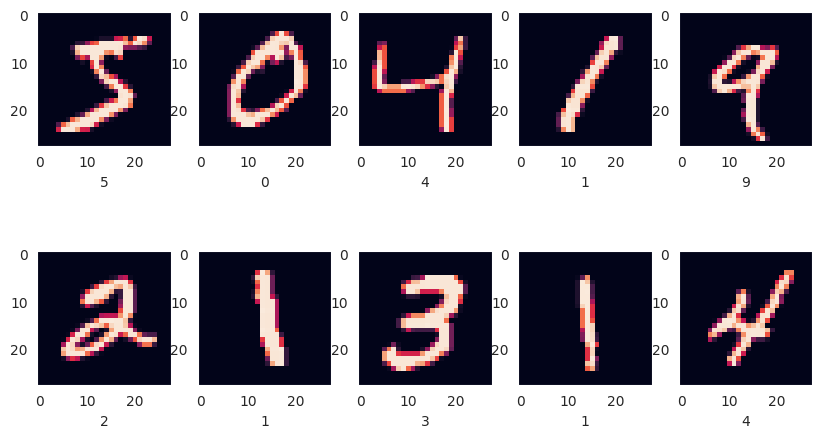

In [38]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [42]:

import numpy as np

class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
        self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
            self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
        self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

    def RELU(self, Z):
        # Implement the RELU activation function
        return np.maximum(0, Z)

    def softmax(self, Z):
        # Implement the softmax activation function
        # Subtract max for numerical stability
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward_propagation(self, X):
        # Implement the forward_propagation function
        activations = {}
        activations['A0'] = X

        # Forward pass through hidden layers
        for i in range(1, self.num_layers + 1):
            Z = np.dot(self.weights_biases[f'W{i}'], activations[f'A{i-1}']) + self.weights_biases[f'b{i}']
            activations[f'A{i}'] = self.RELU(Z)
            activations[f'Z{i}'] = Z

        # Output layer with softmax
        Z_out = np.dot(self.weights_biases[f'W{self.num_layers + 1}'], activations[f'A{self.num_layers}']) + self.weights_biases[f'b{self.num_layers + 1}']
        A_out = self.softmax(Z_out)
        activations[f'A{self.num_layers + 1}'] = A_out
        activations[f'Z{self.num_layers + 1}'] = Z_out

        self.activations = activations
        return A_out, activations

    def one_hot_encode(self, y):
        # Implement one hot encoding
        one_hot = np.zeros((self.output_size, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        # Implement the total loss function (cross-entropy)
        m = Y.shape[1]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(Y * np.log(y_pred)) / m
        return loss

    def backward_prop(self, y_pred, Y):
        # Implement the backward_prop function
        m = Y.shape[1]
        gradients = {}

        # Output layer gradients
        dZ_out = y_pred - Y
        gradients[f'dW{self.num_layers + 1}'] = (1/m) * np.dot(dZ_out, self.activations[f'A{self.num_layers}'].T)
        gradients[f'db{self.num_layers + 1}'] = (1/m) * np.sum(dZ_out, axis=1, keepdims=True)

        dA = np.dot(self.weights_biases[f'W{self.num_layers + 1}'].T, dZ_out)

        for i in range(self.num_layers, 0, -1):

            dZ = dA * (self.activations[f'Z{i}'] > 0)
            gradients[f'dW{i}'] = (1/m) * np.dot(dZ, self.activations[f'A{i-1}'].T)
            gradients[f'db{i}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

            if i > 1:
                dA = np.dot(self.weights_biases[f'W{i}'].T, dZ)

        return gradients

    def update_params(self, gradients):
        for i in range(1, self.num_layers + 2):
            self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
            self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

    def train(self, X, y, num_iterations):
        # Implement train
        self.initial_params()
        Y = self.one_hot_encode(y)

        for i in range(num_iterations):
            # Forward propagation
            y_pred, _ = self.forward_propagation(X)

            # Calculate loss
            loss = self.total_loss(y_pred, Y)

            # Backward propagation
            gradients = self.backward_prop(y_pred, Y)

            # Update parameters
            self.update_params(gradients)

            # Print loss every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        A, b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)
        return predictions

In [43]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration 0, Loss: 18.0781
Iteration 100, Loss: 0.6757
Iteration 200, Loss: 0.4858
Iteration 300, Loss: 0.4238
Iteration 400, Loss: 0.3279
Iteration 500, Loss: 0.2902
Iteration 600, Loss: 0.2633
Iteration 700, Loss: 0.2519
Iteration 800, Loss: 0.2258
Iteration 900, Loss: 0.2126
Iteration 1000, Loss: 0.2034
Iteration 1100, Loss: 0.1923
Iteration 1200, Loss: 0.1841
Iteration 1300, Loss: 0.1822
Iteration 1400, Loss: 0.1750
Iteration 1500, Loss: 0.1652
Iteration 1600, Loss: 0.1573
Iteration 1700, Loss: 0.1528
Iteration 1800, Loss: 0.1534
Iteration 1900, Loss: 0.1445
Iteration 2000, Loss: 0.1387
Iteration 2100, Loss: 0.1371
Iteration 2200, Loss: 0.1329
Iteration 2300, Loss: 0.1310
Iteration 2400, Loss: 0.1293
Iteration 2500, Loss: 0.1253
Iteration 2600, Loss: 0.1192
Iteration 2700, Loss: 0.1173
Iteration 2800, Loss: 0.1138
Iteration 2900, Loss: 0.1110
Iteration 3000, Loss: 0.1091
Iteration 3100, Loss: 0.1080
Iteration 3200, Loss: 0.1045
Iteration 3300, Loss: 0.1020
Iteration 3400, Loss: 0.1

In [44]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if m[i]==d[i]:
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 93.89 %


3


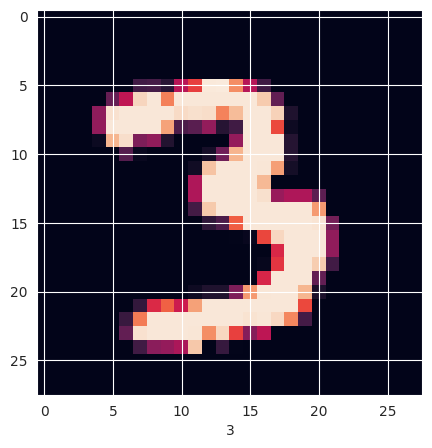

In [45]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
